In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.interpolate import interp1d
import GPy

import tikzplotlib

In [172]:
def global_function(x1,x2,x3):
    return np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)

def local_function_1(x1):
    return np.sin(x1**3)
def local_function_2(x2):
    return np.cos(x2**2)
def local_function_3(x3):
    return np.sin(x3)

In [173]:
# plot the global function

# # plt.style.use("ggplot")
# x_test = np.linspace(-1.5,1.5,1000)
# plt.plot(x_test, global_function(x_test,x_test,x_test), label='Global function Adjusted')
# plt.xlabel('x')
# plt.ylabel('f(x1,x2,x3)')
# plt.title('Global function')



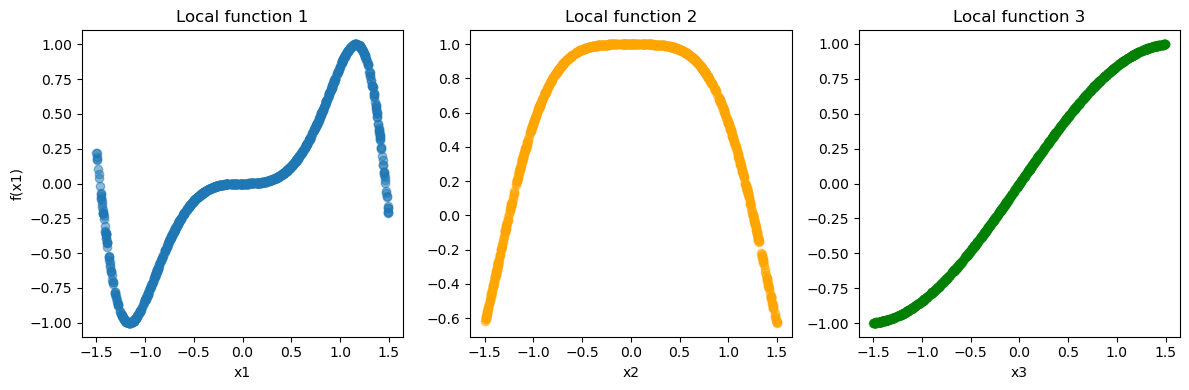

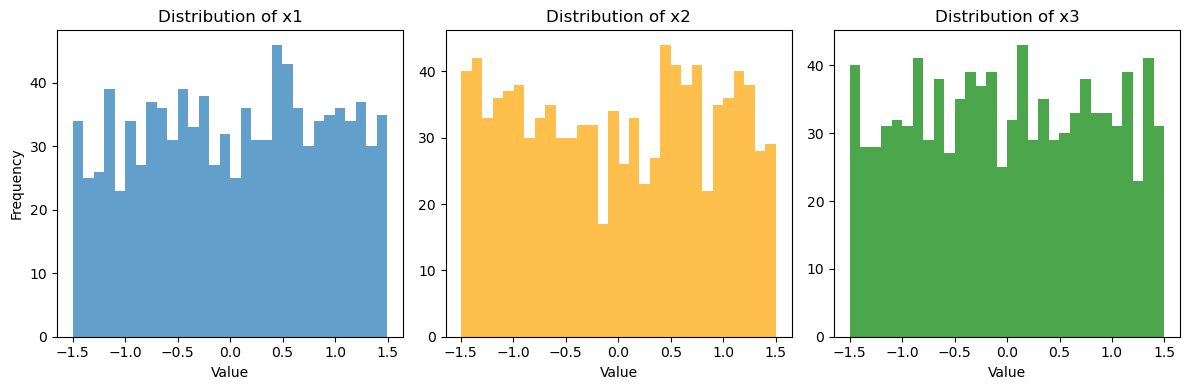

In [174]:
# # Sample x1, x2, x3 separately to ensure they are different and adhere to i.i.d requirements

x1 = np.random.uniform(-1.5, 1.5, 1000)
x2 = np.random.uniform(-1.5, 1.5, 1000)
x3 = np.random.uniform(-1.5, 1.5, 1000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x1, local_function_1(x1), 'o', alpha=0.5)
plt.title('Local function 1')
plt.xlabel('x1')
plt.ylabel('f(x1)')
plt.subplot(1, 3, 2)
plt.plot(x2, local_function_2(x2), 'o', alpha=0.5, color='orange')
plt.title('Local function 2')
plt.xlabel('x2')
plt.subplot(1, 3, 3)
plt.plot(x3, local_function_3(x3), 'o', alpha=0.5, color='green')
plt.title('Local function 3')
plt.xlabel('x3')
plt.tight_layout()
plt.show()

# Plotting distributions to confirm i.i.d nature
plt.figure(figsize=(12, 4))

# Distribution of x1
plt.subplot(1, 3, 1)
plt.hist(x1, bins=30, alpha=0.7)
plt.title('Distribution of x1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Distribution of x2
plt.subplot(1, 3, 2)
plt.hist(x2, bins=30, alpha=0.7, color='orange')
plt.title('Distribution of x2')
plt.xlabel('Value')

# Distribution of x3
plt.subplot(1, 3, 3)
plt.hist(x3, bins=30, alpha=0.7, color='green')
plt.title('Distribution of x3')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [175]:
# #plot for tikz
# # tikzplotlib.clean_figure()

# plt.style.use("ggplot")
# plt.plot(x3, local_function_3(x3), 'o', alpha=0.5)
# plt.title('Local function 2')
# plt.xlabel('x3')
# plt.ylabel('f(x3)')


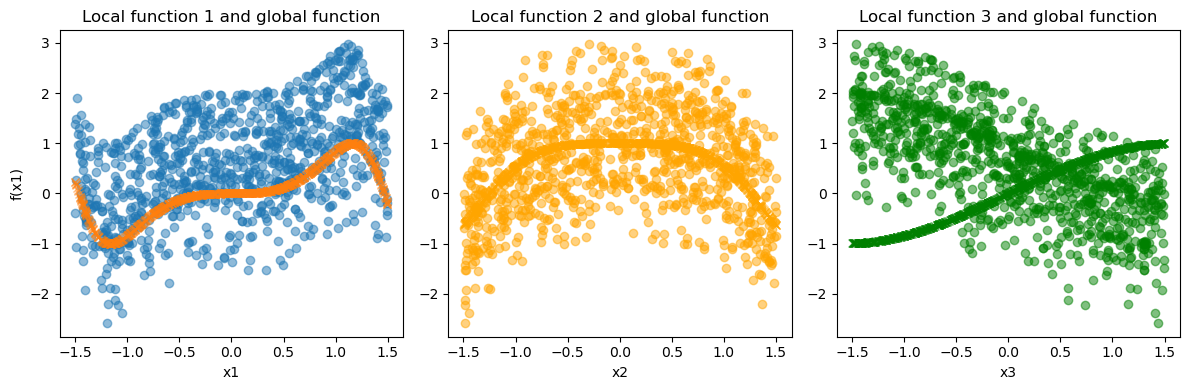

Correlation between local function 1 and global function: 0.5403818974285076
Correlation between local function 2 and global function: 0.5031811453551709
Correlation between local function 3 and global function: -0.7157801599264624


In [176]:
x =np.array([x1,x2,x3]).flatten()




global_values = global_function(x1, x2, x3)

local_values_1 = local_function_1(x1)
local_values_2 = local_function_2(x2)
local_values_3 = local_function_3(x3)




corr1 = pearsonr(local_values_1, global_values)[0]
corr2 = pearsonr(local_values_2, global_values)[0]
corr3 = pearsonr(local_values_3, global_values)[0]


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x1, global_values, 'o', alpha=0.5)
plt.plot(x1,local_values_1, 'x', alpha=0.5,)
plt.title('Local function 1 and global function')
plt.xlabel('x1')
plt.ylabel('f(x1)')
plt.subplot(1, 3, 2)
plt.plot(x2, global_values, 'o', alpha=0.5, color='orange')
plt.plot(x2,local_values_2, 'x', alpha=0.5, color='orange')
plt.title('Local function 2 and global function')
plt.xlabel('x2')
plt.subplot(1, 3, 3)
plt.plot(x3, global_values, 'o', alpha=0.5, color='green')
plt.plot(x3,local_values_3, 'x', alpha=0.5, color='green')
plt.title('Local function 3 and global function')
plt.xlabel('x3')
plt.tight_layout()
plt.show()

print('Correlation between local function 1 and global function:', corr1)
print('Correlation between local function 2 and global function:', corr2)
print('Correlation between local function 3 and global function:', corr3)

plt.close()






In [177]:
local_values_1 = np.asarray(local_values_1)

global_values = np.asarray(global_values)

***Create A GP Regression to pedict the correlation between the global and the local rewards as GP***
